In [1]:
%matplotlib notebook
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import colors 
from matplotlib.ticker import PercentFormatter 
import seaborn as sns

In [2]:
df = pd.read_parquet("ListagemChamadaRegular_2017-1.parquet", engine="fastparquet")
df2 = pd.read_parquet("ListagemChamadaRegular_2017-2.parquet", engine="fastparquet")

In [3]:
df2.rename(columns={'ï»¿NU_ANO': 'NU_ANO'}, inplace=True)

In [4]:
df = df.drop(['DS_ETAPA'], axis=1)

In [5]:
df2 = df2.drop(['DS_ETAPA', 'ST_MATRICULA'], axis=1)

In [6]:
df['LISTAGEM'] = 1
df2['LISTAGEM'] = 2

In [7]:
rdf = pd.concat([df, df2])

In [8]:
tdf = rdf

In [9]:
ies_list = tdf["CO_IES"].value_counts().index
ies_nome = []
ies_sigla = []
ies_list = ies_list.tolist()
ies_dict = {}
for ies in ies_list:
    row = tdf[tdf["CO_IES"] == ies].iloc[0]
    ies_nome.append(row["NO_IES"])
    ies_sigla.append(row["SIGLA_IES"])

In [10]:
cnt = 0
for ies in ies_list:
    ies_dict[ies] = [ies_sigla[cnt],ies_nome[cnt]]
    cnt = cnt + 1

In [11]:
for ies in ies_list:
    ies_arr = ies_dict[ies]
    sigla = ies_arr[0]
    nome = ies_arr[1]
    tdf.loc[tdf['CO_IES'] == ies, ['NO_IES','SIGLA_IES']] = [nome,sigla]

In [12]:
campus_list = tdf["CO_CAMPUS"].value_counts().index
campus_nome = []
campus_list = campus_list.tolist()
campus_dict = {}
for campus in campus_list:
    row = tdf[tdf["CO_CAMPUS"] == campus].iloc[0]
    campus_nome.append(row["NO_CAMPUS"])

In [13]:
cnt = 0
for campus in campus_list:
    campus_dict[campus] = campus_nome[cnt]
    cnt = cnt + 1

In [14]:
for campus in campus_list:
    nome = campus_dict[campus]
    tdf.loc[tdf['CO_CAMPUS'] == campus, ['NO_CAMPUS']] = nome

In [15]:
curso_list = tdf["CO_IES_CURSO"].value_counts().index
curso_nome = []
curso_list = curso_list.tolist()
curso_dict = {}
for curso in curso_list:
    row = tdf[tdf["CO_IES_CURSO"] == curso].iloc[0]
    curso_nome.append(row["NO_CURSO"])

In [16]:
cnt = 0
for curso in curso_list:
    curso_dict[curso] = curso_nome[cnt]
    cnt = cnt + 1

In [17]:
for curso in curso_list:
    nome = curso_dict[curso]
    tdf.loc[tdf['CO_IES_CURSO'] == curso, ['NO_CURSO']] = nome

In [18]:
tdf['CPF_DIGITOS'] = tdf['NU_CPF'].map(lambda x: x.lstrip('X.').rstrip('-X'))

In [19]:
tdf['CPF_DIGITOS'] = tdf['CPF_DIGITOS'].str.replace('.', '')

In [20]:
tdf['ID_CONCAT'] = tdf[["NO_INSCRITO", "DT_NASCIMENTO", "CPF_DIGITOS"]].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [21]:
idconcat_value_counts = tdf['ID_CONCAT'].value_counts(dropna=True, sort=True)
df_idconcat_val_counts = pd.DataFrame(idconcat_value_counts)
df_idconcat_value_counts_reset = df_idconcat_val_counts.reset_index()
df_idconcat_value_counts_reset.columns = ['String concatenada', 'Quantidade']
display(df_idconcat_value_counts_reset)

,String concatenada,Quantidade
0,FABIANY DE OLIVEIRA_26/10/82_795197,2
1,LUIZA DA COSTA CRUZ_12/07/93_931599,2
2,TAUANNE FERNANDA DOS SANTOS_04/09/92_072729,2
3,JAIANE RODRIGUES DA SILVA_27/09/96_241422,2
4,BRENDA MONTEIRO RIBEIRO_05/02/97_070133,2
...,...,...
3429741,KAROLLYNE DE SOSA TERRA_06/01/1998_645940,1
3429742,MATHEUS HENRIQUE DOS SANTOS_25/11/94_955930,1
3429743,LETICIA VAZ CARDOSO_04/02/1999_944946,1
3429744,JOSE DE JESUS NUNES JUNIOR_30/09/98_170999,1


In [22]:
dfconcat = tdf[['ID_CONCAT', 'LISTAGEM']]
l1 = dfconcat[dfconcat['LISTAGEM'] == 1]
l2 = dfconcat[dfconcat['LISTAGEM'] == 2]

In [23]:
tot1 = l1['ID_CONCAT'].value_counts()
tot2 = l2['ID_CONCAT'].value_counts()
tot1 = tot1.values
tot2 = tot2.values

In [24]:
nonrep1 = np.count_nonzero(tot1 == 1)
rep1 = np.count_nonzero(tot1 == 2)
nonrep2 = np.count_nonzero(tot2 == 1)
rep2 = np.count_nonzero(tot2 == 2)

In [25]:
dfreq = pd.DataFrame({"Listagem 1": [nonrep1, rep1],
                     "Listagem 2": [nonrep1, rep2]})
dfreq.index = ["Únicos", "Duplicados"]
display(dfreq)

,Listagem 1,Listagem 2
Únicos,119786,119786
Duplicados,2374410,861836


In [26]:
tdf['NOTA_CONCAT'] = tdf[['NU_NOTA_L', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_M', 'NU_NOTA_R']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [27]:
nconcat_value_counts = tdf['NOTA_CONCAT'].value_counts(dropna=True, sort=True)
df_nconcat_val_counts = pd.DataFrame(nconcat_value_counts)
df_nconcat_value_counts_reset = df_nconcat_val_counts.reset_index()
df_nconcat_value_counts_reset.columns = ['String concatenada', 'Quantidade']
display(df_nconcat_value_counts_reset)

,String concatenada,Quantidade
0,0.0_0.0_0.0_0.0_520.0,17
1,0.0_0.0_0.0_0.0_560.0,14
2,0.0_0.0_0.0_0.0_760.0,13
3,0.0_0.0_0.0_0.0_660.0,12
4,0.0_0.0_0.0_0.0_600.0,12
...,...,...
2625193,439.4_509.0_395.8_358.8_440.0,1
2625194,545.7_496.4_441.8_462.6_540.0,1
2625195,599.7_580.7_546.9_553.1_540.0,1
2625196,504.6_541.7_474.7_418.5_460.0,1


In [28]:
top_nomes = tdf["NO_IES"].value_counts().nlargest(10).index.tolist()
top_qte = tdf["NO_IES"].value_counts().nlargest(10).values
total_alunos = len(tdf)

In [29]:
dftop_ies = pd.DataFrame({"Nome": [top_nomes[0], top_nomes[1], top_nomes[2], top_nomes[3], top_nomes[4], 
                                   top_nomes[5], top_nomes[6], top_nomes[7], top_nomes[8], top_nomes[9]],
                     "Quantidade": [top_qte[0], top_qte[1], top_qte[2], top_qte[3], top_qte[4], 
                                    top_qte[5], top_qte[6], top_qte[7], top_qte[8], top_qte[9]],
                         "Percentual": [top_qte[0]/total_alunos, top_qte[1]/total_alunos, top_qte[2]/total_alunos, top_qte[3]/total_alunos, top_qte[4]/total_alunos, 
                                    top_qte[5]/total_alunos, top_qte[6]/total_alunos, top_qte[7]/total_alunos, top_qte[8]/total_alunos, top_qte[9]/total_alunos]})
dftop_ies_formatted = dftop_ies.style.format({'Percentual': "{:,.2%}"})
display(dftop_ies_formatted)

,Nome,Quantidade,Percentual
0,UNIVERSIDADE FEDERAL DO MARANHÃO,252687,3.79%
1,UNIVERSIDADE FEDERAL DO RIO DE JANEIRO,228477,3.43%
2,UNIVERSIDADE FEDERAL FLUMINENSE,208364,3.13%
3,UNIVERSIDADE FEDERAL DA BAHIA,200383,3.01%
4,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE SÃO PAULO",175083,2.63%
5,UNIVERSIDADE FEDERAL DO PIAUÍ,173126,2.60%
6,UNIVERSIDADE FEDERAL DA PARAÍBA,173091,2.60%
7,UNIVERSIDADE FEDERAL DE MINAS GERAIS,172277,2.58%
8,UNIVERSIDADE TECNOLÓGICA FEDERAL DO PARANÁ,152355,2.29%
9,UNIVERSIDADE FEDERAL DE PERNAMBUCO,144508,2.17%


In [30]:
uf_ies = tdf["SG_UF_IES"].tolist()
uf_campi = tdf["SG_UF_CAMPUS"].tolist()

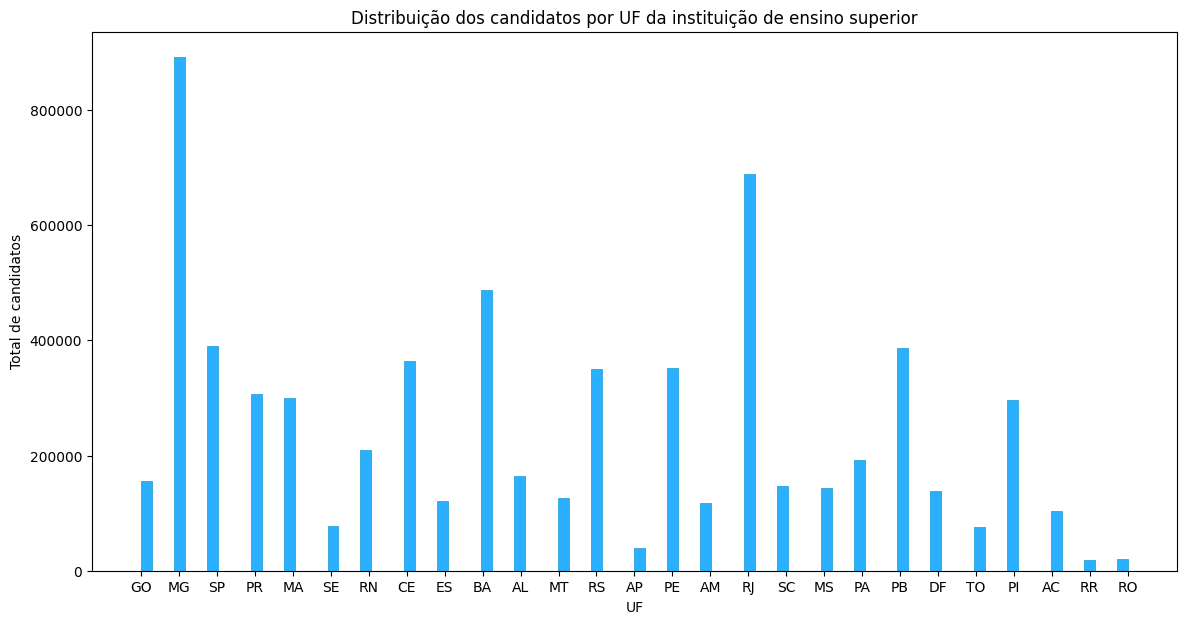

In [31]:
%matplotlib inline
plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.hist(uf_ies, bins=90, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
#plt.xticks(notas_intervalo, notas_intervalo, rotation ='vertical') 
plt.title('Distribuição dos candidatos por UF da instituição de ensino superior') 
plt.xlabel('UF') 
plt.ylabel('Total de candidatos')
#plt.savefig("dist_uf_ies.png")
plt.show()

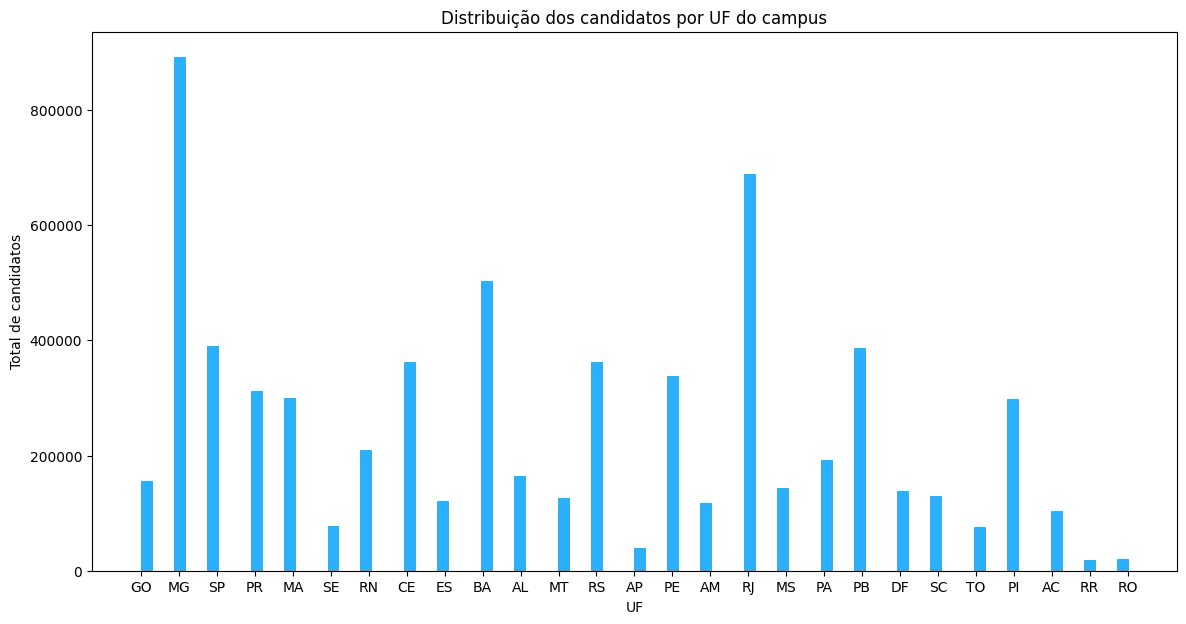

In [32]:
%matplotlib inline
plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.hist(uf_campi, bins=90, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
#plt.xticks(notas_intervalo, notas_intervalo, rotation ='vertical') 
plt.title('Distribuição dos candidatos por UF do campus') 
plt.xlabel('UF') 
plt.ylabel('Total de candidatos')
#plt.savefig("dist_uf_campi.png")
plt.show()

In [33]:
uf_res_n = tdf["SG_UF_CANDIDATO"][tdf["ST_APROVADO"] == "N"].tolist()
uf_res_s = tdf["SG_UF_CANDIDATO"][tdf["ST_APROVADO"] == "S"].tolist()

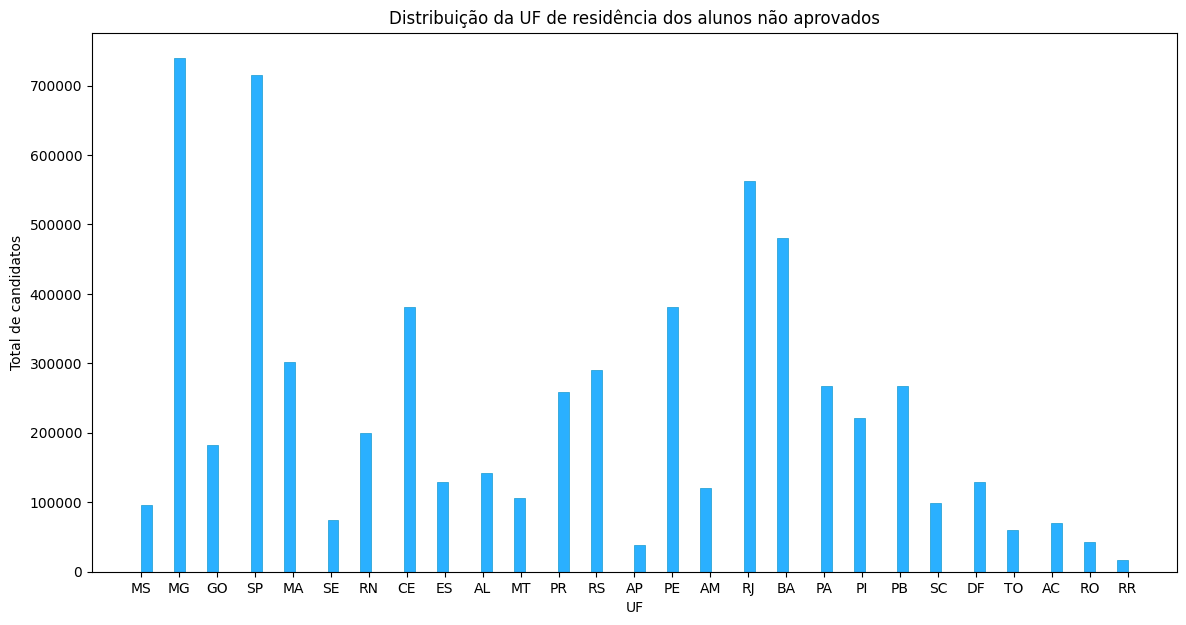

In [34]:
%matplotlib inline
plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.hist(uf_res_n, bins=90, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
#plt.xticks(notas_intervalo, notas_intervalo, rotation ='vertical') 
plt.title('Distribuição da UF de residência dos alunos não aprovados') 
plt.xlabel('UF') 
plt.ylabel('Total de candidatos')
#plt.savefig("dist_uf_res_n.png")
plt.show()

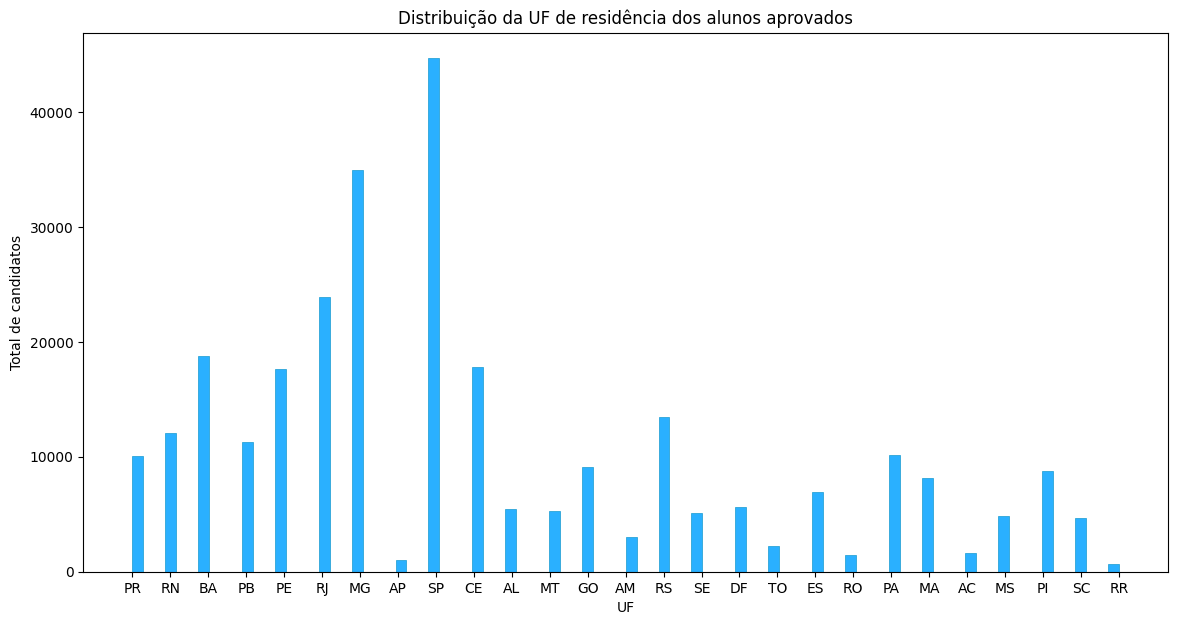

In [35]:
%matplotlib inline
plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.hist(uf_res_s, bins=90, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
#plt.xticks(notas_intervalo, notas_intervalo, rotation ='vertical') 
plt.title('Distribuição da UF de residência dos alunos aprovados') 
plt.xlabel('UF') 
plt.ylabel('Total de candidatos')
#plt.savefig("dist_uf_res_s.png")
plt.show()

In [36]:
nlc = tdf[["NU_NOTA_L", "TP_SEXO"]]
nlc_h = nlc[nlc['TP_SEXO'] == "M"]
nlc_m = nlc[nlc['TP_SEXO'] == "F"]
nlc_h = nlc_h['NU_NOTA_L']
nlc_m = nlc_m['NU_NOTA_L']

In [37]:
nred = df[["NU_NOTA_R", "TP_SEXO"]]
nred = nred.dropna()
nred_h = nred[nred['TP_SEXO'] == "M"]
nred_m = nred[nred['TP_SEXO'] == "F"]
nred_h = nred_h['NU_NOTA_R']
nred_m = nred_m['NU_NOTA_R']

In [38]:
nmt = df[["NU_NOTA_M", "TP_SEXO"]]
nmt = nmt.dropna()
nmt_h = nmt[nmt['TP_SEXO'] == "M"]
nmt_m = nmt[nmt['TP_SEXO'] == "F"]
nmt_h = nmt_h['NU_NOTA_M']
nmt_m = nmt_m['NU_NOTA_M']

In [39]:
ncn = df[["NU_NOTA_CN", "TP_SEXO"]]
ncn = ncn.dropna()
ncn_h = ncn[ncn['TP_SEXO'] == "M"]
ncn_m = ncn[ncn['TP_SEXO'] == "F"]
ncn_h = ncn_h['NU_NOTA_CN']
ncn_m = ncn_m['NU_NOTA_CN']

In [40]:
nch = df[["NU_NOTA_CH", "TP_SEXO"]]
nch = nch.dropna()
nch_h = nch[nch['TP_SEXO'] == "M"]
nch_m = nch[nch['TP_SEXO'] == "F"]
nch_h = nch_h['NU_NOTA_CH']
nch_m = nch_m['NU_NOTA_CH']

[Text(0.5, 0, 'Nota Redação (Masc.)'), Text(0, 0.5, 'Densidade')]

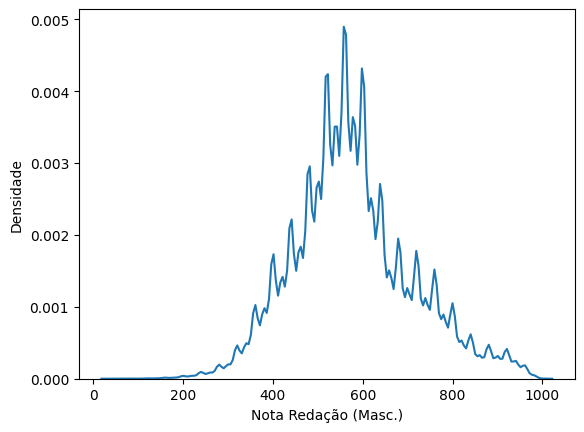

In [41]:
ax = sns.kdeplot(data= nred_h)
ax.set(xlabel='Nota Redação (Masc.)', ylabel='Densidade')

[Text(0.5, 0, 'Nota Redação (Fem.)'), Text(0, 0.5, 'Densidade')]

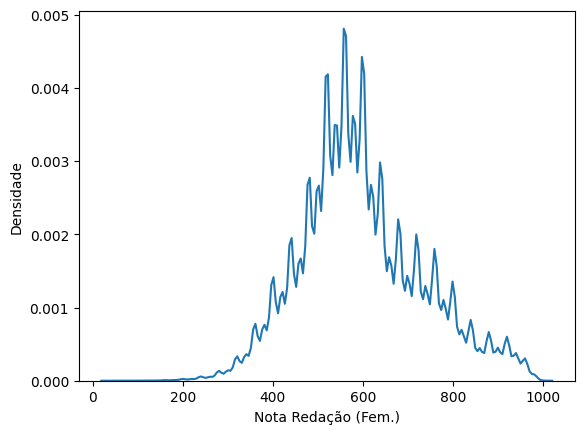

In [42]:
ax = sns.kdeplot(data= nred_m)
ax.set(xlabel='Nota Redação (Fem.)', ylabel='Densidade')

[Text(0.5, 0, 'Nota Ciências Humanas (Masc.)'), Text(0, 0.5, 'Densidade')]

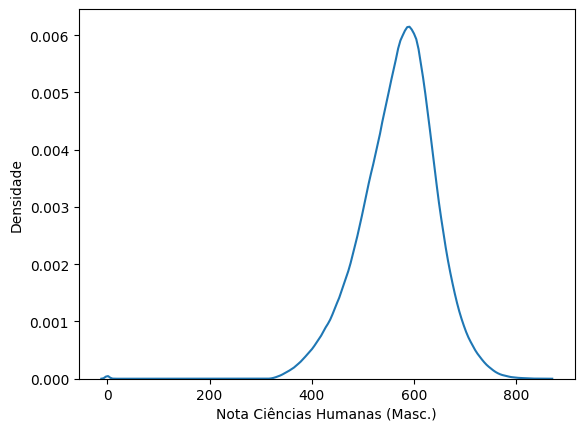

In [43]:
ax = sns.kdeplot(data= nch_h)
ax.set(xlabel='Nota Ciências Humanas (Masc.)', ylabel='Densidade')

[Text(0.5, 0, 'Nota Ciências Humanas (Fem.)'), Text(0, 0.5, 'Densidade')]

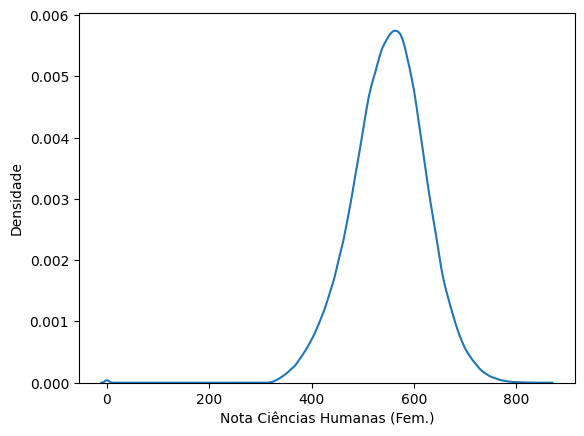

In [44]:
ax = sns.kdeplot(data= nch_m)
ax.set(xlabel='Nota Ciências Humanas (Fem.)', ylabel='Densidade')

[Text(0.5, 0, 'Nota Ciências da Natureza (Masc.)'), Text(0, 0.5, 'Densidade')]

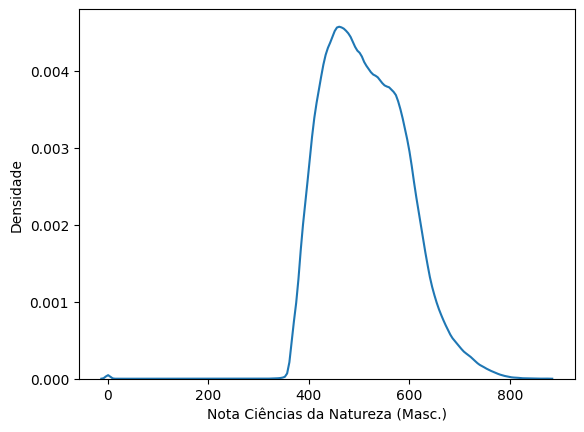

In [45]:
ax = sns.kdeplot(data= ncn_h)
ax.set(xlabel='Nota Ciências da Natureza (Masc.)', ylabel='Densidade')

[Text(0.5, 0, 'Nota Ciências da Natureza (Fem.)'), Text(0, 0.5, 'Densidade')]

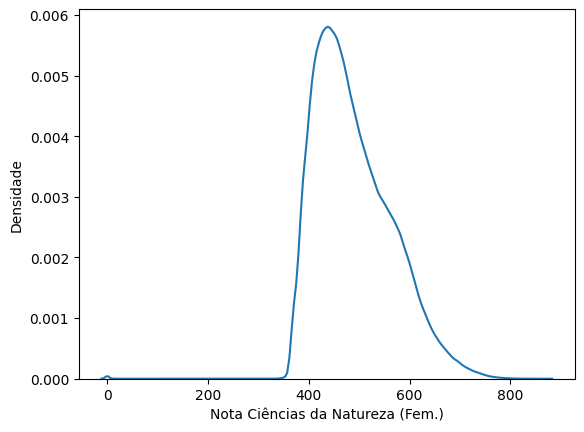

In [46]:
ax = sns.kdeplot(data= ncn_m)
ax.set(xlabel='Nota Ciências da Natureza (Fem.)', ylabel='Densidade')

[Text(0.5, 0, 'Nota Linguagens e Códigos (Masc.)'), Text(0, 0.5, 'Densidade')]

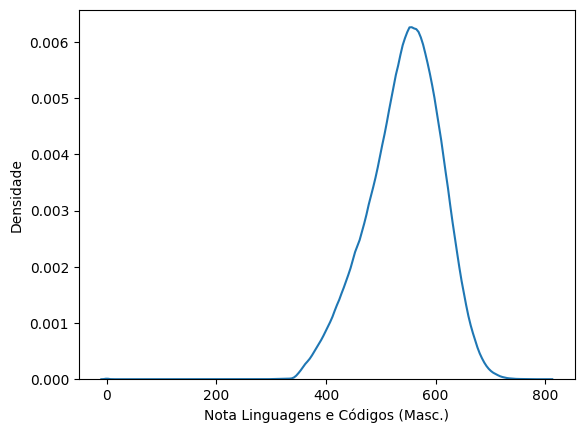

In [47]:
ax = sns.kdeplot(data= nlc_h)
ax.set(xlabel='Nota Linguagens e Códigos (Masc.)', ylabel='Densidade')

[Text(0.5, 0, 'Nota Linguagens e Códigos (Fem.)'), Text(0, 0.5, 'Densidade')]

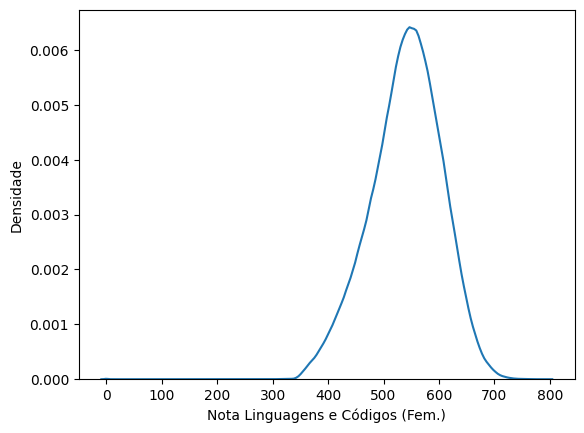

In [48]:
ax = sns.kdeplot(data= nlc_m)
ax.set(xlabel='Nota Linguagens e Códigos (Fem.)', ylabel='Densidade')

[Text(0.5, 0, 'Nota Matemática (Masc.)'), Text(0, 0.5, 'Densidade')]

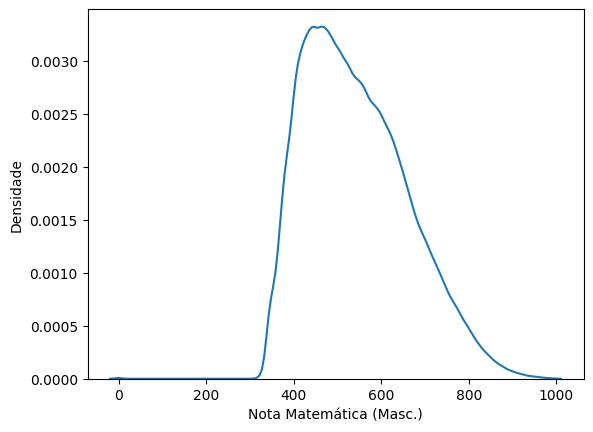

In [49]:
ax = sns.kdeplot(data= nmt_h)
ax.set(xlabel='Nota Matemática (Masc.)', ylabel='Densidade')

[Text(0.5, 0, 'Nota Matemática (Fem.)'), Text(0, 0.5, 'Densidade')]

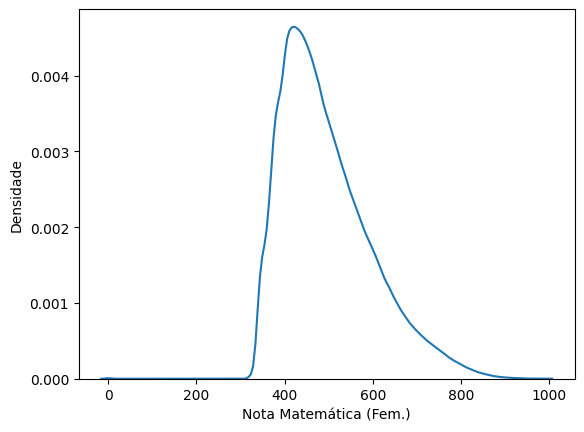

In [50]:
ax = sns.kdeplot(data= nmt_m)
ax.set(xlabel='Nota Matemática (Fem.)', ylabel='Densidade')

In [51]:
grau_n = tdf["DS_GRAU"][tdf["ST_APROVADO"] == "N"].value_counts()
grau_s = tdf["DS_GRAU"][tdf["ST_APROVADO"] == "S"].value_counts()

In [52]:
grau = ["Bacharelado", "Licenciatura", "Tecnológico", "Área Básica de Ingresso (ABI)"]


In [53]:
grau_n = grau_n.values
grau_s = grau_s.values
grau_n_cor = []
grau_s_cor = []
grau_n_cor = [grau_n[0], grau_n[1], grau_n[2]+grau_n[3], grau_n[4]+grau_n[5]]
grau_s_cor = [grau_s[0], grau_s[1], grau_s[2]+grau_s[3], grau_s[4]+grau_s[5]]

In [54]:
tot_grau_n = sum(grau_n_cor)
tot_grau_s = sum(grau_s_cor)

In [55]:
df_grau = pd.DataFrame({"Percentual aprovados": grau_s_cor/tot_grau_s,
                        "Percentual não aprovados": grau_n_cor/tot_grau_n})

df_grau.index = grau
df_grau_formatted = df_grau.style.format({'Percentual aprovados': "{:,.2%}",
                                         'Percentual não aprovados': "{:,.2%}"})
display(df_grau_formatted)

,Percentual aprovados,Percentual não aprovados
Bacharelado,62.82%,66.39%
Licenciatura,26.08%,21.62%
Tecnológico,8.81%,9.52%
Área Básica de Ingresso (ABI),2.30%,2.46%


In [56]:
turno_n = tdf["DS_TURNO"][tdf["ST_APROVADO"] == "N"].value_counts()
turno_s = tdf["DS_TURNO"][tdf["ST_APROVADO"] == "S"].value_counts()

In [57]:
turno = turno_n.index

In [58]:
turno_n = turno_n.values
turno_s = turno_s.values
tot_turno_n = sum(turno_n)
tot_turno_s = sum(turno_s)

In [59]:
df_turno = pd.DataFrame({"Percentual aprovados": turno_s/tot_turno_s,
                        "Percentual não aprovados": turno_n/tot_turno_n})

df_turno.index = turno.tolist()
df_turno_formatted = df_turno.style.format({'Percentual aprovados': "{:,.2%}",
                                         'Percentual não aprovados': "{:,.2%}"})
display(df_turno_formatted)

,Percentual aprovados,Percentual não aprovados
Integral,44.27%,45.34%
Noturno,35.45%,34.67%
Matutino,12.34%,12.28%
Vespertino,7.94%,7.70%


In [60]:
conc_n = tdf["DS_MOD_CONCORRENCIA"][tdf["ST_APROVADO"] == "N"].value_counts().values
conc_s = tdf["DS_MOD_CONCORRENCIA"][tdf["ST_APROVADO"] == "S"].value_counts().values
tot_conc_n = conc_n.sum()
tot_conc_s = conc_s.sum()

In [61]:
new_conc_n = conc_n[0] + conc_n[1]
new_conc_s = conc_s[0] + conc_s[1]

In [62]:
df_conc = pd.DataFrame({"Percentual aprovados": [new_conc_s/tot_conc_s],
                        "Percentual não aprovados": [new_conc_n/tot_conc_n]})
df_conc.index = ["Ampla concorrência"]
df_conc_formatted = df_conc.style.format({'Percentual aprovados': "{:,.2%}",
                                         'Percentual não aprovados': "{:,.2%}"})
display(df_conc_formatted)

,Percentual aprovados,Percentual não aprovados
Ampla concorrência,48.06%,45.76%


In [63]:
gen_n_f = tdf["TP_SEXO"][tdf["ST_APROVADO"] == "N"].value_counts()["F"]
gen_n_m = tdf["TP_SEXO"][tdf["ST_APROVADO"] == "N"].value_counts()["M"]
gen_s_f = tdf["TP_SEXO"][tdf["ST_APROVADO"] == "S"].value_counts()["F"]
gen_s_m = tdf["TP_SEXO"][tdf["ST_APROVADO"] == "S"].value_counts()["M"]

tot_gen_n = gen_n_f + gen_n_m
tot_gen_s = gen_s_f + gen_s_m



In [64]:
df_gen = pd.DataFrame({"Percentual aprovados": [gen_s_f/tot_gen_s, gen_s_m/tot_gen_s],
                        "Percentual não aprovados": [gen_n_f/tot_gen_n, gen_n_m/tot_gen_n]})
df_gen.index = ["Feminino", "Masculino"]
df_gen_formatted = df_gen.style.format({'Percentual aprovados': "{:,.2%}",
                                         'Percentual não aprovados': "{:,.2%}"})
display(df_gen_formatted)

,Percentual aprovados,Percentual não aprovados
Feminino,46.49%,57.94%
Masculino,53.51%,42.06%


In [65]:
nlc_n_media = np.average(tdf["NU_NOTA_L"][tdf["ST_APROVADO"] == "N"])
nlc_s_media = np.average(tdf["NU_NOTA_L"][tdf["ST_APROVADO"] == "S"])
nlc_n_dp = np.std(tdf["NU_NOTA_L"][tdf["ST_APROVADO"] == "N"])
nlc_s_dp = np.std(tdf["NU_NOTA_L"][tdf["ST_APROVADO"] == "S"])

In [66]:
df_lc = pd.DataFrame({"Aprovados": [nlc_s_media, nlc_s_dp],
                        "Não aprovados": [nlc_n_media, nlc_s_dp]})
df_lc.index = ["Média", "Desvio padrão"]
display(df_lc)

,Aprovados,Não aprovados
Média,605.784180,538.489929
Desvio padrão,48.379284,48.379284


In [67]:
nch_n_media = np.average(tdf["NU_NOTA_CH"][tdf["ST_APROVADO"] == "N"])
nch_s_media = np.average(tdf["NU_NOTA_CH"][tdf["ST_APROVADO"] == "S"])
nch_n_dp = np.std(tdf["NU_NOTA_CH"][tdf["ST_APROVADO"] == "N"])
nch_s_dp = np.std(tdf["NU_NOTA_CH"][tdf["ST_APROVADO"] == "S"])

In [68]:
df_ch = pd.DataFrame({"Aprovados": [nch_s_media, nch_s_dp],
                        "Não aprovados": [nch_n_media, nch_s_dp]})
df_ch.index = ["Média", "Desvio padrão"]
display(df_ch)

,Aprovados,Não aprovados
Média,639.822205,557.156189
Desvio padrão,50.481293,50.481293


In [69]:
ncn_n_media = np.average(tdf["NU_NOTA_CN"][tdf["ST_APROVADO"] == "N"])
ncn_s_media = np.average(tdf["NU_NOTA_CN"][tdf["ST_APROVADO"] == "S"])
ncn_n_dp = np.std(tdf["NU_NOTA_CN"][tdf["ST_APROVADO"] == "N"])
ncn_s_dp = np.std(tdf["NU_NOTA_CN"][tdf["ST_APROVADO"] == "S"])

In [70]:
df_cn = pd.DataFrame({"Aprovados": [ncn_s_media, ncn_s_dp],
                        "Não aprovados": [ncn_n_media, ncn_s_dp]})
df_cn.index = ["Média", "Desvio padrão"]
display(df_cn)

,Aprovados,Não aprovados
Média,595.547852,496.905945
Desvio padrão,69.800827,69.800827


In [71]:
nmt_n_media = np.average(tdf["NU_NOTA_M"][tdf["ST_APROVADO"] == "N"])
nmt_s_media = np.average(tdf["NU_NOTA_M"][tdf["ST_APROVADO"] == "S"])
nmt_n_dp = np.std(tdf["NU_NOTA_M"][tdf["ST_APROVADO"] == "N"])
nmt_s_dp = np.std(tdf["NU_NOTA_M"][tdf["ST_APROVADO"] == "S"])

In [72]:
df_mt = pd.DataFrame({"Aprovados": [nmt_s_media, nmt_s_dp],
                        "Não aprovados": [nmt_n_media, nmt_s_dp]})
df_mt.index = ["Média", "Desvio padrão"]
display(df_mt)

,Aprovados,Não aprovados
Média,649.332458,511.598511
Desvio padrão,115.083672,115.083672


In [73]:
nred_n_media = np.average(tdf["NU_NOTA_R"][tdf["ST_APROVADO"] == "N"])
nred_s_media = np.average(tdf["NU_NOTA_R"][tdf["ST_APROVADO"] == "S"])
nred_n_dp = np.std(tdf["NU_NOTA_R"][tdf["ST_APROVADO"] == "N"])
nred_s_dp = np.std(tdf["NU_NOTA_R"][tdf["ST_APROVADO"] == "S"])

In [74]:
df_red = pd.DataFrame({"Aprovados": [nred_s_media, nred_s_dp],
                        "Não aprovados": [nred_n_media, nred_s_dp]})
df_red.index = ["Média", "Desvio padrão"]
display(df_red)

,Aprovados,Não aprovados
Média,750.184204,585.788147
Desvio padrão,120.407372,120.407372


In [75]:
nlc_value_counts = tdf['NU_NOTA_L'].value_counts(dropna=True, sort=True)
df_nlc_val_counts = pd.DataFrame(nlc_value_counts)
df_nlc_value_counts_reset = df_nlc_val_counts.reset_index()
df_nlc_value_counts_reset.columns = ['Nota', 'Quantidade']
display(df_nlc_value_counts_reset)

,Nota,Quantidade
0,551.799988,4515
1,552.400024,4465
2,563.700012,4458
3,547.299988,4449
4,548.700012,4433
...,...,...
4534,766.599976,1
4535,318.399994,1
4536,322.100006,1
4537,323.799988,1


In [76]:
nch_value_counts = tdf['NU_NOTA_CH'].value_counts(dropna=True, sort=True)
df_nch_val_counts = pd.DataFrame(nch_value_counts)
df_nch_value_counts_reset = df_nch_val_counts.reset_index()
df_nch_value_counts_reset.columns = ['Nota', 'Quantidade']
display(df_nch_value_counts_reset)

,Nota,Quantidade
0,571.900024,4174
1,573.599976,4173
2,578.200012,4151
3,566.400024,4131
4,579.099976,4125
...,...,...
4989,808.000000,2
4990,830.900024,2
4991,814.599976,1
4992,838.599976,1


In [77]:
ncn_value_counts = tdf['NU_NOTA_CN'].value_counts(dropna=True, sort=True)
df_ncn_val_counts = pd.DataFrame(ncn_value_counts)
df_ncn_value_counts_reset = df_ncn_val_counts.reset_index()
df_ncn_value_counts_reset.columns = ['Nota', 'Quantidade']
display(df_ncn_value_counts_reset)

,Nota,Quantidade
0,441.299988,4105
1,414.700012,3952
2,442.799988,3812
3,442.500000,3669
4,440.600006,3630
...,...,...
4904,345.000000,1
4905,816.900024,1
4906,813.599976,1
4907,331.500000,1


In [78]:
nmt_value_counts = tdf['NU_NOTA_M'].value_counts(dropna=True, sort=True)
df_nmt_val_counts = pd.DataFrame(nmt_value_counts)
df_nmt_value_counts_reset = df_nmt_val_counts.reset_index()
df_nmt_value_counts_reset.columns = ['Nota', 'Quantidade']
display(df_nmt_value_counts_reset)

,Nota,Quantidade
0,423.500000,5778
1,476.000000,4839
2,403.500000,4057
3,396.600006,3555
4,448.399994,3112
...,...,...
6508,983.000000,2
6509,970.400024,1
6510,310.700012,1
6511,319.399994,1


In [79]:
nred_value_counts = tdf['NU_NOTA_R'].value_counts(dropna=True, sort=True)
df_nred_val_counts = pd.DataFrame(nred_value_counts)
df_nred_value_counts_reset = df_nred_val_counts.reset_index()
df_nred_value_counts_reset.columns = ['Nota', 'Quantidade']
display(df_nred_value_counts_reset)

,Nota,Quantidade
0,560.0,575694
1,600.0,520061
2,520.0,496594
3,580.0,418979
4,540.0,403393
...,...,...
151,217.0,2
152,809.0,2
153,842.0,2
154,592.0,1
